In [1]:
using QuantumOptics
using PyPlot

In [2]:
# Parameters
N_cutoff = 15          # Maximum photons
ω_c = 1.0              # Cavity frequency
ω_a = 1.0              # Atom frequency
g_coup = 0.05          # Coupling strength

0.05

In [3]:
# Define Bases
# FockBasis(N) creates states 0 to N. 
# SpinBasis(1//2) creates a 2-level system
b_cav = FockBasis(N_cutoff)
b_atom = SpinBasis(1//2)

Spin(1/2)

In [4]:

b_sys = b_cav ⊗ b_atom

[Fock(cutoff=15) ⊗ Spin(1/2)]

In [5]:
# Cavity Operators
a_cav = destroy(b_cav)
I_cav = identityoperator(b_cav)

# Atom Operators
sm_atom = sigmam(b_atom) 
sz_atom = sigmaz(b_atom)
I_atom = identityoperator(b_atom)

Operator(dim=2x2)
  basis: Spin(1/2)
Eye(2)

In [6]:
a  = a_cav ⊗ I_atom
sm = I_cav ⊗ sm_atom
sz = I_cav ⊗ sz_atom

Operator(dim=32x32)
  basis: [Fock(cutoff=15) ⊗ Spin(1/2)]
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎦

In [7]:
# Hamiltonian
H = ω_c * a' * a + 0.5 * ω_a * sz + g_coup * (a' * sm + a * sm')

println("Hamiltonian constructed successfully!")
println(H)

Hamiltonian constructed successfully!
Operator(dim=32x32)
  basis: [Fock(cutoff=15) ⊗ Spin(1/2)]
⎡⠑⢄⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⎤
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠈⠢⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠈⠢⎥
⎢⠢⡀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎣⠀⠀⠀⠀⠀⠈⠢⡀⠀⠀⠀⠀⠀⠀⠑⢄⎦


Time Evolution (Rabi Oscillations)

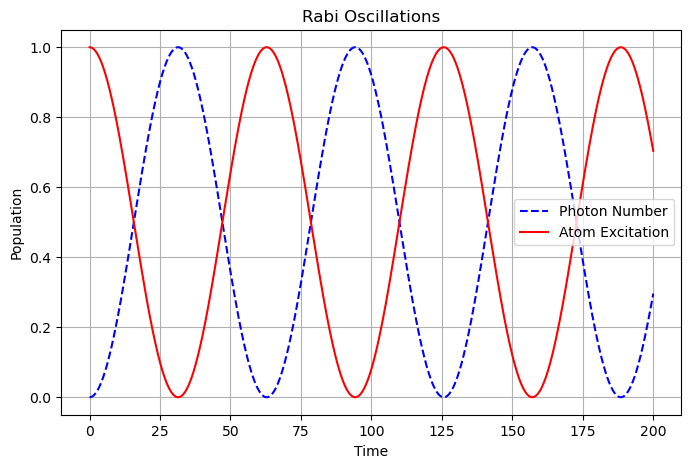

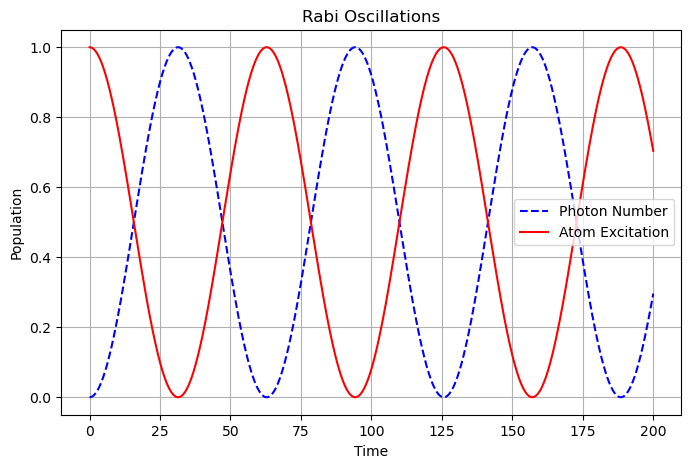

In [8]:
# Define Initial State
# |0> cavity (x) |up> atom
psi0 = fockstate(b_cav, 0) ⊗ spinup(b_atom)

# Define Time List
# Julia uses [start:step:end]
T = [0:0.1:200;] 

# Run the Solver (Schrödinger Equation)
# Returns: Time points (tout) and State vectors (psi_t)
tout, psi_t = timeevolution.schroedinger(T, psi0, H)

# Calculate Observables
# real() converts complex numbers to floats for plotting

# Photon Number
n_op = a' * a
n_vals = real(expect(n_op, psi_t))

# Atom Excitation Probability
P_exc_op = (sz + one(sz)) / 2
P_vals = real(expect(P_exc_op, psi_t))

# Plotting
figure(figsize=(8, 5))
plot(tout, n_vals, label="Photon Number", color="blue", linestyle="--")
plot(tout, P_vals, label="Atom Excitation", color="red")

xlabel("Time")
ylabel("Population")
title("Rabi Oscillations")
legend()
grid(true)
display(gcf())

In [9]:
# --- 1. Parameters ---
N = 3              # Keep cutoff small (Total states = (4*2)^2 = 64)
ω = 1.0            # Resonance
g = 0.05           # Atom-Cavity Coupling
J = 0.05           # Photon Hopping

# --- 2. Define Bases ---
b_cav = FockBasis(N)
b_atom = SpinBasis(1//2)

# Create a "Single Site" basis (Cavity + Atom)
b_site = b_cav ⊗ b_atom

# Create the "Full System" basis (Site 1 + Site 2)
b_total = b_site ⊗ b_site

# --- 3. Define Operators ---
# We define local operators on the "Site Basis" first
a_local = destroy(b_cav) ⊗ one(b_atom)
sm_local = one(b_cav) ⊗ sigmam(b_atom)
sz_local = one(b_cav) ⊗ sigmaz(b_atom)

# Now expand them to the "Full System"
# Site 1 operators act on the left, Identity on the right
a1  = a_local ⊗ one(b_site)
sm1 = sm_local ⊗ one(b_site)
sz1 = sz_local ⊗ one(b_site)

# Site 2 operators act on the right, Identity on the left
a2  = one(b_site) ⊗ a_local
sm2 = one(b_site) ⊗ sm_local
sz2 = one(b_site) ⊗ sz_local

# --- 4. Construct Hamiltonian ---
# Local Jaynes-Cummings Terms
H_site1 = ω*a1'*a1 + 0.5*ω*sz1 + g*(a1'*sm1 + a1*sm1')
H_site2 = ω*a2'*a2 + 0.5*ω*sz2 + g*(a2'*sm2 + a2*sm2')

# Hopping Term (Interaction between Cavity 1 and Cavity 2)
H_hop = -J * (a1'*a2 + a1*a2')

# Total Hamiltonian
H_total = H_site1 + H_site2 + H_hop

println("2-Site JCH Hamiltonian Built Successfully!")
println(H_total)

2-Site JCH Hamiltonian Built Successfully!
Operator(dim=64x64)
  basis: [Fock(cutoff=3) ⊗ Spin(1/2) ⊗ Fock(cutoff=3) ⊗ Spin(1/2)]
⎡⠑⢄⠈⠢⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠢⡀⠐⢄⠀⠀⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠈⠢⠀⠀⠑⢄⠈⠢⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠈⠢⠢⡀⠑⢄⠀⠀⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠈⠢⠀⠀⠑⢄⠈⠢⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠈⠢⠢⡀⠑⢄⠀⠀⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠀⠀⠑⢄⠈⠢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠢⡀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠐⢄⠈⠢⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠢⡀⠁⢄⠀⠀⠢⡀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠀⠀⠑⢄⠈⠢⠢⡀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠢⡀⠐⢄⠀⠀⠢⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠀⠀⠑⢄⠈⠢⠢⡀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠢⡀⠑⢄⠀⠀⠢⡀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠀⠀⠑⢄⠈⠢⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠑⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠢⠢⡀⠑⢄⎦
